Forja libre en frío y caliente
==

Una pieza cilíndrica se forja en una prensa con matrices planas. El diámetro inicial es de 45 mm y la altura inicial es de 40 mm. La altura después del forjado es de 25 mm. El coeficiente de fricción en la interfaz matriz-pieza es de 0.20. El material de trabajo es un acero 1015. Determine la fuerza de la operación cuando:

1) El material empieza a plastificar (fluencia a la deformación de 0,002)
2) $h=35$ mm
3) $h=25$ mm

Repita los cálculos para un material a 1000 °C con las siguientes condiciones de velocidad:

1) Velocidad de deformación constante 10 s$^{-1}$
2) Velocidad de la prensa constante 400 mm/s

Datos del acero 1015:

    YS = 300 MPa, UTS = 450 MPa, elongación = 35 %, reducción de área = 70 %
    En frío:   K = 620 MPa, n = 0.18
    A 800 °C:  C = 150 MPa, m = 0.1
    A 1000 °C: C = 120 MPa, m = 0.1
    A 1200 °C: C =  50 MPa, m = 0.17


Curvas de comportamiento del material (velocidad de deformación constante 10 s-1)


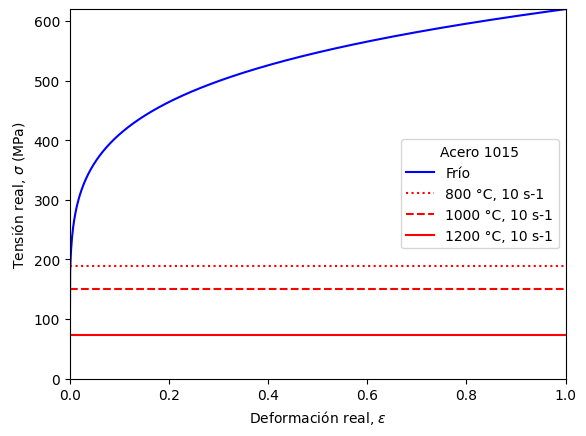

In [1]:
print('Curvas de comportamiento del material (velocidad de deformación constante 10 s-1)')

def SY_frio(e):
    return 620*e**0.18
def SY_800(e, vd):
    return 150*e**0*vd**0.1
def SY_1000(e, vd):
    return 120*e**0*vd**0.1
def SY_1200(e, vd):
    return 50*e**0*vd**0.17


import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 1, 0.001);
plt.plot(x, SY_frio(x), 'b-', label='Frío')
plt.plot(x, SY_800(x, 10), 'r:', label='800 °C, 10 s-1')
plt.plot(x, SY_1000(x, 10), 'r--', label='1000 °C, 10 s-1')
plt.plot(x, SY_1200(x, 10), 'r-', label='1200 °C, 10 s-1')
plt.axis([0, 1, 0, SY_frio(1)])
plt.legend(title='Acero 1015')
plt.xlabel(r"Deformación real, $\varepsilon$")
plt.ylabel(r"Tensión real, $\sigma$ (MPa)")
plt.show()


In [2]:
d0 = 45
h0 = 40
A0 = int(np.pi*d0**2/4)
V0 = A0*h0
print('Cilindro de partida: h0=%s mm, d0=%s mm --> A0=%s mm2, V0=%s mm3' % (h0, d0, A0, V0))

def A(h):
    return np.round(A0*h0/h, 0)
def e(h):
    return np.round(np.log(h0/h), 3)
def h(e):
    return np.round(h0*np.exp(-e), 1)

hY = h(0.002)
h1 = int(35/40*h0)
h2 = int(25/40*h0)

print('Evolución del cilindro:')
print('    h=%s mm --> A=%s mm2, deformacion=%s' % (h0, A0, 0))
print('    h=%s mm --> A=%s mm2, deformacion=%s (empieza a plastificar)' % (hY, A(hY), e(hY)))
print('    h=%s mm --> A=%s mm2, deformacion=%s' % (h1, A(h1), e(h1)))
print('    h=%s mm --> A=%s mm2, deformacion=%s' % (h2, A(h2), e(h2)))

Cilindro de partida: h0=40 mm, d0=45 mm --> A0=1590 mm2, V0=63600 mm3
Evolución del cilindro:
    h=40 mm --> A=1590 mm2, deformacion=0
    h=39.9 mm --> A=1594.0 mm2, deformacion=0.003 (empieza a plastificar)
    h=35 mm --> A=1817.0 mm2, deformacion=0.134
    h=25 mm --> A=2544.0 mm2, deformacion=0.47


Curvas de comportamiento del cilindro


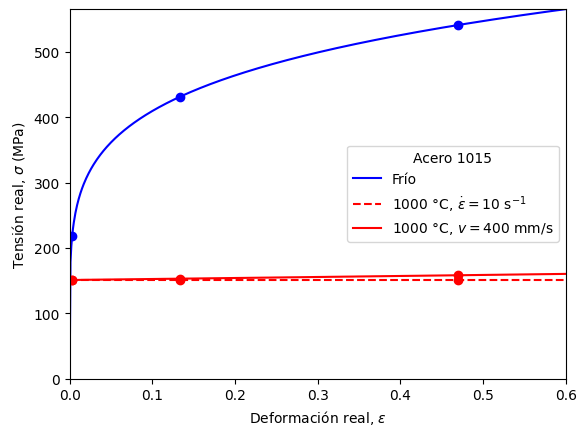

In [3]:
print('Curvas de comportamiento del cilindro')

v = h0*10

def SY2_1000(v, h):
    return 120*(v/h)**0.1

h_list = [hY, h1, h2]
e_list = [e(x) for x in h_list]
s25 = [SY_frio(x) for x in e_list]
s1000 = [SY_1000(x, 10) for x in e_list]
SY_1000_v1000 = [SY2_1000(v, x) for x in h_list]

x = np.arange(0, 1, 0.001)
SY2_v1000 = [SY2_1000(v, h(e)) for e in x]

plt.plot(x, SY_frio(x), 'b-', label='Frío')
plt.plot(x, SY_1000(x, 10), 'r--', label=r'1000 °C, $\dot\varepsilon=10$ s$^{-1}$')
plt.plot(x, SY2_v1000, 'r-', label=r'1000 °C, $v=%s$ mm/s' % v)
plt.plot(e_list, s25, 'bo')
plt.plot(e_list, s1000, 'ro')
plt.plot(e_list, SY_1000_v1000, 'ro')
plt.axis([0, 0.6, 0, SY_frio(0.6)])
plt.legend(title='Acero 1015')
plt.xlabel(r"Deformación real, $\varepsilon$")
plt.ylabel(r"Tensión real, $\sigma$ (MPa)")
plt.show()


Suponiendo que no hay fricción
Para cada altura de cilindro:
    h = [39.9, 35, 25] mm
Fuerza a velocidad de deformación constante:
    F = [241. 274. 384.] kN
Fuerza a velocidad constante:
    F = [241. 278. 403.] kN


/tmp/ipykernel_62327/566212650.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return 120*(v/h)**0.1


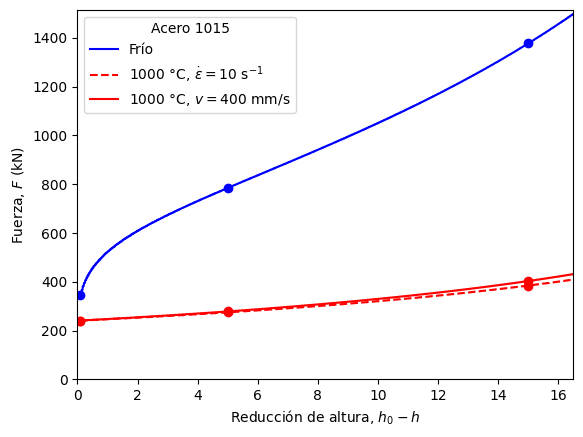

In [4]:
print('Suponiendo que no hay fricción')

# F en kN
def F_frio(h):
    return np.round(SY_frio(e(h))*A(h) / 1000, 0)
def F_1000(h):
    return np.round(SY_1000(e(h), 10)*A(h) / 1000, 0)
def F_1000_v(h):
    return np.round(SY2_1000(v, h)*A(h) / 1000, 0)

Ff = [F_frio(x) for x in h_list]
Fc1 = [F_1000(x) for x in h_list]
Fc2 = [F_1000_v(x) for x in h_list]
ih_list = [h0-i for i in h_list]
print('Para cada altura de cilindro:')
print('    h = [%s, %s, %s] mm' % (hY, h1, h2))
print('Fuerza a velocidad de deformación constante:')
print('    F = %s kN' % np.array(Fc1))
print('Fuerza a velocidad constante:')
print('    F = %s kN' % np.array(Fc2))

x = np.arange(hY, h2*0.8, -0.01)
SY2_v1000 = [SY2_1000(v, h(e)) for e in x]

plt.plot(h0-x, F_frio(x), 'b-', label='Frío')
plt.plot(h0-x, F_1000(x), 'r--', label=r'1000 °C, $\dot\varepsilon=10$ s$^{-1}$')
plt.plot(h0-x, F_1000_v(x), 'r-', label=r'1000 °C, $v=%s$ mm/s' % v)
plt.plot(ih_list, Ff, 'bo')
plt.plot(ih_list, Fc1, 'ro')
plt.plot(ih_list, Fc2, 'ro')
plt.axis([0, (h0-h2)*1.1, 0, F_frio(h2)*1.1])
plt.legend(title='Acero 1015')
plt.xlabel(r"Reducción de altura, $h_0-h$")
plt.ylabel(r"Fuerza, $F$ (kN)")
plt.show()


Teniendo en cuenta la fricción
Para cada altura de cilindro:
    h = [39.9, 35, 25] mm
Coeficientes de mayoración de la fuerza debido a la fricción:
    Kf = [1.09  1.11  1.182]
Fuerza en frío:
    F = [ 378.  871. 1628.] kN
Fuerza a velocidad de deformación constante:
    F = [241. 274. 384.] kN
Fuerza a velocidad constante:
    F = [241. 278. 403.] kN
Efecto de la fricción en la evolución de la fuerza:


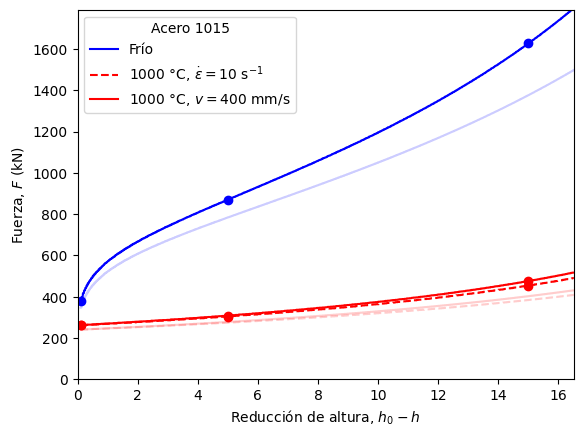

In [5]:
print('Teniendo en cuenta la fricción')

mu = 0.2
def d(h):
    return np.round(np.sqrt(4*A(h)/np.pi), 1)
def Kf(h):
    return np.round(1+0.4*mu*d(h)/h, 3)
def FKf_frio(h):
    return np.round(F_frio(h)*Kf(h), 0)
def FKf_1000(h):
    return np.round(F_1000(h)*Kf(h), 0)
def FKf_1000_v(h):
    return np.round(F_1000_v(h)*Kf(h), 0)

KKf = [Kf(x) for x in h_list]
FKf = [FKf_frio(x) for x in h_list]
FKc1 = [FKf_1000(x) for x in h_list]
FKc2 = [FKf_1000_v(x) for x in h_list]
print('Para cada altura de cilindro:')
print('    h = [%s, %s, %s] mm' % (hY, h1, h2))
print('Coeficientes de mayoración de la fuerza debido a la fricción:')
print('    Kf = %s' % np.array(KKf))
print('Fuerza en frío:')
print('    F = %s kN' % np.array(FKf))
print('Fuerza a velocidad de deformación constante:')
print('    F = %s kN' % np.array(Fc1))
print('Fuerza a velocidad constante:')
print('    F = %s kN' % np.array(Fc2))

print('Efecto de la fricción en la evolución de la fuerza:')

alfa = 0.2
plt.plot(h0-x, F_frio(x), 'b-', alpha=alfa)
plt.plot(h0-x, F_1000(x), 'r--', alpha=alfa)
plt.plot(h0-x, F_1000_v(x), 'r-', alpha=alfa)

plt.plot(h0-x, FKf_frio(x), 'b-', label='Frío')
plt.plot(h0-x, FKf_1000(x), 'r--', label=r'1000 °C, $\dot\varepsilon=10$ s$^{-1}$')
plt.plot(h0-x, FKf_1000_v(x), 'r-', label=r'1000 °C, $v=%s$ mm/s' % v)
plt.plot(ih_list, FKf, 'bo')
plt.plot(ih_list, FKc1, 'ro')
plt.plot(ih_list, FKc2, 'ro')

plt.axis([0, (h0-h2)*1.1, 0, FKf_frio(h2)*1.1])
plt.legend(title='Acero 1015')
plt.xlabel(r"Reducción de altura, $h_0-h$")
plt.ylabel(r"Fuerza, $F$ (kN)")
plt.show()
